In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Reading deliveries
df=pd.read_csv('deliveries.csv')

In [3]:
#Reading matches
df1=pd.read_csv('matches.csv')

In [4]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
print(df.shape)
print(df1.shape)

(164750, 21)
(696, 18)


In [8]:
dfc= [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] #Categorical Variable

dfc

['batting_team',
 'bowling_team',
 'batsman',
 'non_striker',
 'bowler',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [9]:
dfn= [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable
dfn


['match_id',
 'inning',
 'over',
 'ball',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs']

In [10]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
dtype: int64

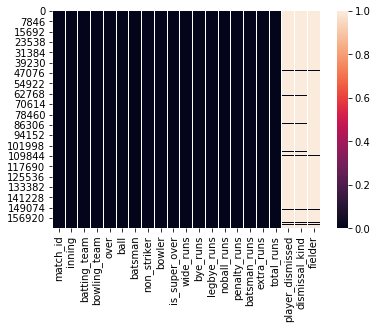

In [12]:
sns.heatmap(df.isnull())
plt.show()

In [14]:
df['fielder'].value_counts()

KD Karthik             145
MS Dhoni               142
RV Uthappa             120
AB de Villiers         108
SK Raina               107
PA Patel                88
RG Sharma               87
V Kohli                 84
NV Ojha                 82
WP Saha                 78
KA Pollard              76
AC Gilchrist            75
DJ Bravo                73
RA Jadeja               71
MK Pandey               70
S Dhawan                66
DA Warner               60
AT Rayudu               58
KC Sangakkara           58
AM Rahane               57
SV Samson               51
BB McCullum             50
YK Pathan               50
MK Tiwary               49
SPD Smith               48
M Vijay                 48
DA Miller               46
DR Smith                43
Harbhajan Singh         42
V Sehwag                42
                      ... 
WP Saha (sub)            1
LA Pomersbach (sub)      1
Umar Gul                 1
Shivam Sharma            1
PV Tambe                 1
B Chipli (sub)           1
T

In [17]:
df['dismissal_kind'].value_counts()

caught                   4861
bowled                   1495
run out                   813
lbw                       494
stumped                   262
caught and bowled         211
retired hurt               11
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

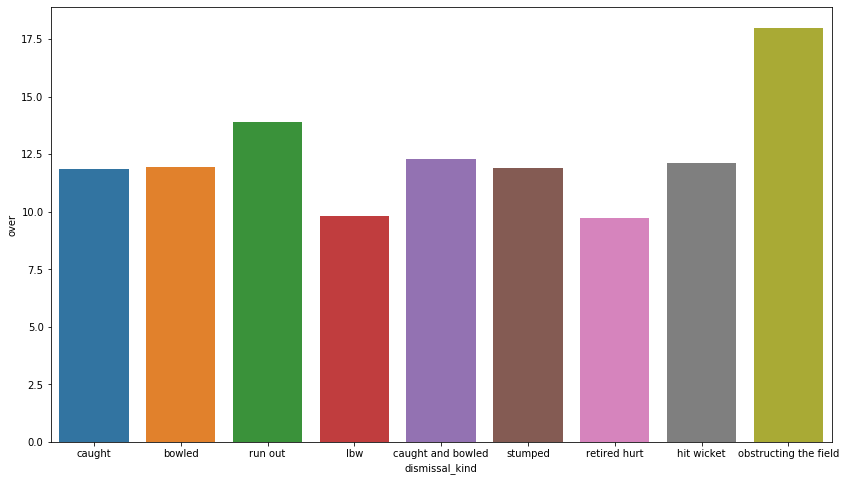

In [26]:
plt.figure(figsize=(14,8))
sns.barplot(df['dismissal_kind'],df['over'],ci=0)
plt.show()


we can see that most of the wickets fell before 13 overs

In [24]:
df['total_runs'].value_counts()


1     67672
0     58061
4     18914
2     11696
6      7360
3       643
5       333
7        38
8        25
10        8
Name: total_runs, dtype: int64

Now lets see what is percentage if the team wins the toss and match

In [28]:
df1['winner'].value_counts()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [29]:
df1['season'].value_counts()

2013    76
2012    74
2011    73
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [31]:
df1['toss_winner'].value_counts()

Mumbai Indians                 90
Kolkata Knight Riders          87
Delhi Daredevils               80
Chennai Super Kings            77
Royal Challengers Bangalore    77
Kings XI Punjab                75
Rajasthan Royals               69
Deccan Chargers                43
Sunrisers Hyderabad            42
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [34]:
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [35]:
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [40]:
df1['city'].value_counts()

Mumbai            94
Kolkata           70
Delhi             67
Bangalore         66
Hyderabad         56
Chennai           49
Chandigarh        46
Jaipur            40
Pune              38
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Indore             9
Dharamsala         9
Johannesburg       8
Abu Dhabi          7
Cape Town          7
Cuttack            7
Ranchi             7
Bengaluru          7
Port Elizabeth     7
Raipur             6
Sharjah            6
Kochi              5
Kanpur             4
Kimberley          3
Nagpur             3
Mohali             3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [42]:
df1['toss_decision'].value_counts()

field    413
bat      283
Name: toss_decision, dtype: int64

# How lucky are the toss winning teams?

In [43]:
df1.groupby(['winner'])['toss_decision'].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              50
                             field            40
Deccan Chargers              field            15
                             bat              14
Delhi Daredevils             field            38
                             bat              29
Gujarat Lions                field            11
                             bat               2
Kings XI Punjab              field            55
                             bat              21
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        field            51
                             bat              35
Mumbai Indians               field            57
                             bat              41
Pune Warriors                bat               9
                             field             3
Rajasthan Royals             field            36
                             bat              34
Rising Pune Supergiant    

In [44]:
df1.groupby(['winner'])['toss_winner'].value_counts()

winner                       toss_winner                
Chennai Super Kings          Chennai Super Kings            50
                             Rajasthan Royals                9
                             Kolkata Knight Riders           6
                             Delhi Daredevils                5
                             Mumbai Indians                  5
                             Sunrisers Hyderabad             4
                             Kings XI Punjab                 3
                             Pune Warriors                   3
                             Royal Challengers Bangalore     3
                             Deccan Chargers                 2
Deccan Chargers              Deccan Chargers                19
                             Royal Challengers Bangalore     4
                             Kings XI Punjab                 2
                             Chennai Super Kings             1
                             Kochi Tuskers Kerala            

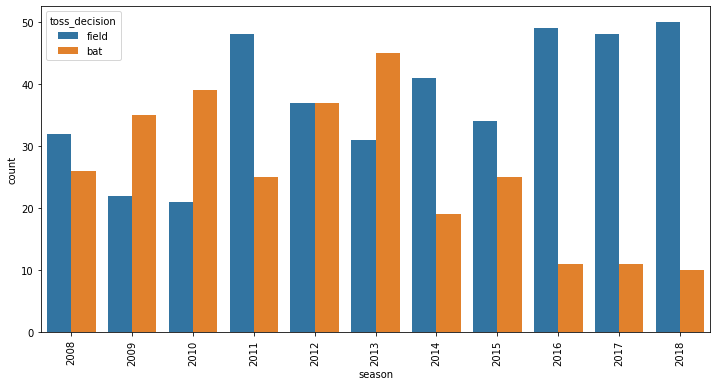

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=df1)
plt.xticks(rotation='vertical')
plt.show()

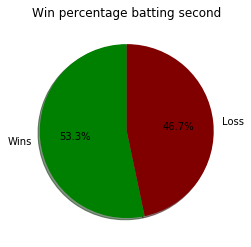

In [90]:
num_of_wins = (df1.win_by_wickets>0).sum()
num_of_loss = (df1.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['Green', 'maroon']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Vivek\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


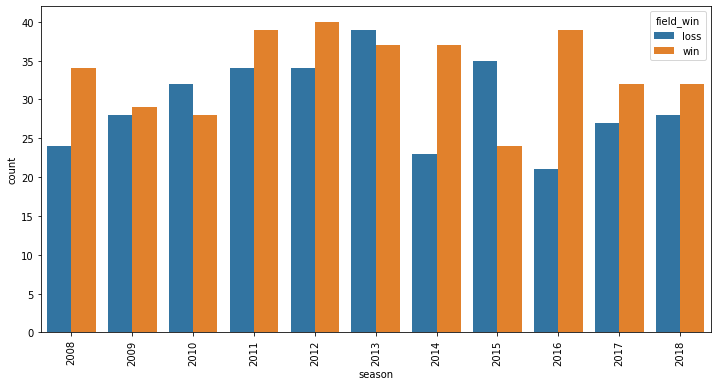

In [92]:
df1["field_win"] = "win"
df1["field_win"].ix[df1['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=df1)
plt.xticks(rotation='vertical')
plt.show()

# Number of Matches Each Season


In [52]:
df1['season'].value_counts()

2013    76
2012    74
2011    73
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

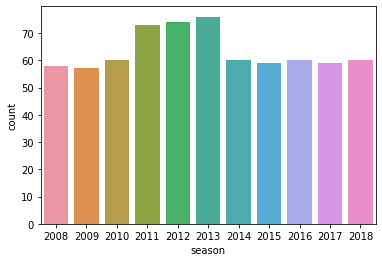

In [54]:
sns.countplot(df1['season'])
plt.show()

From 2011 to 2013 there were many teams so matches played were more

# Number of matches in each venue

In [55]:
df1['city'].value_counts()

Mumbai            94
Kolkata           70
Delhi             67
Bangalore         66
Hyderabad         56
Chennai           49
Chandigarh        46
Jaipur            40
Pune              38
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Indore             9
Dharamsala         9
Johannesburg       8
Abu Dhabi          7
Cape Town          7
Cuttack            7
Ranchi             7
Bengaluru          7
Port Elizabeth     7
Raipur             6
Sharjah            6
Kochi              5
Kanpur             4
Kimberley          3
Nagpur             3
Mohali             3
East London        3
Bloemfontein       2
Name: city, dtype: int64

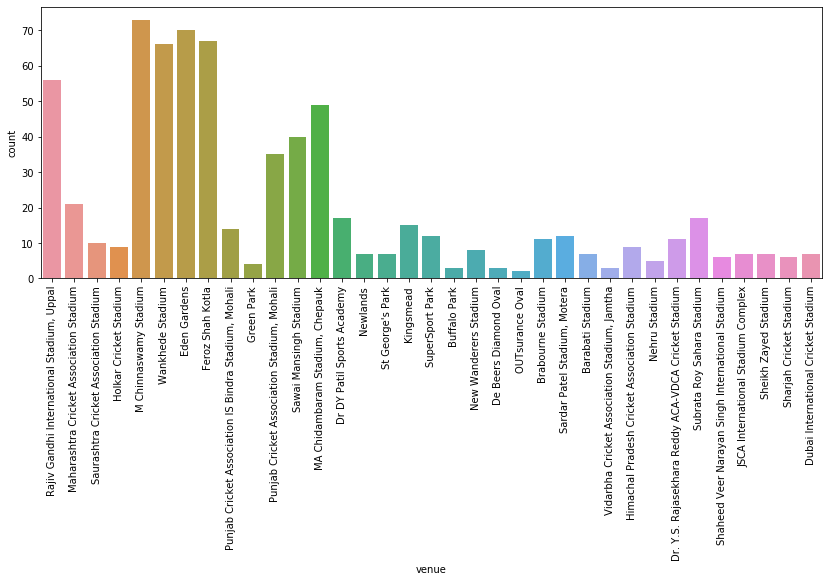

In [64]:
plt.figure(figsize=(14,5))
sns.countplot(df1['venue'])
plt.xticks(rotation='vertical')
plt.show()

Most Matches were Played in Banglore M Chinnaswamy Stadium

# Champions 

In [66]:
temp_df = df1.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


# Number of matches played by each team



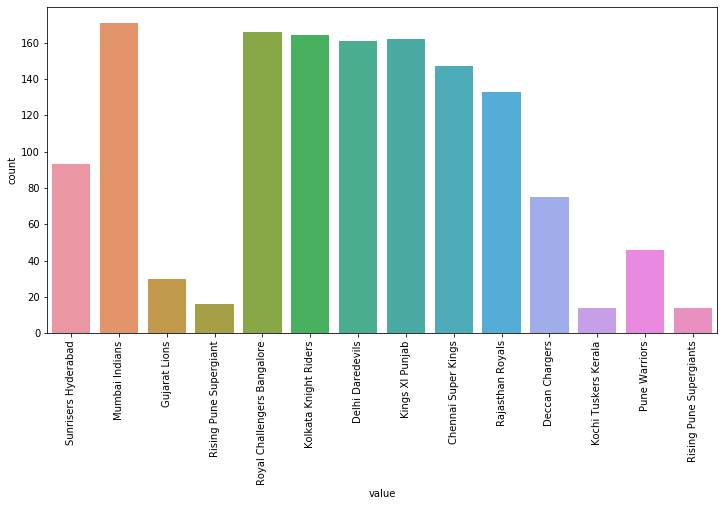

In [67]:
temp_df = pd.melt(df1, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

# Number of wins per team

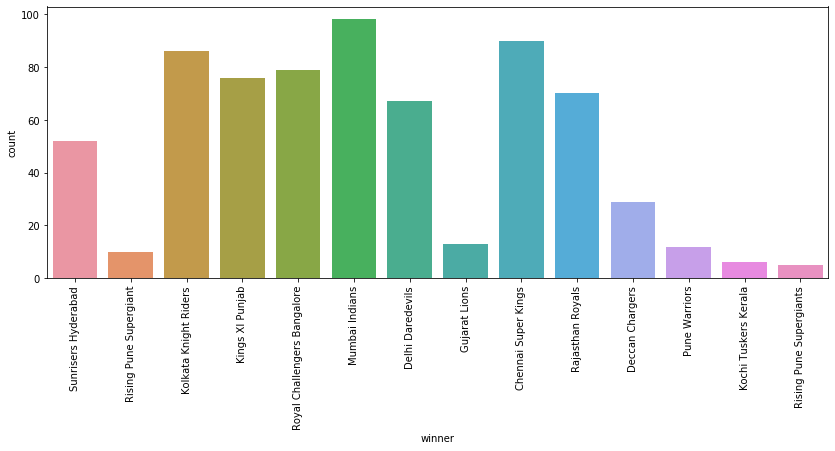

In [73]:
plt.figure(figsize=(14,5))
sns.countplot(df1['winner'])
plt.xticks(rotation='vertical')
plt.show()